In [1]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import glob
import re
import numpy as np
from dateutil import parser
import matplotlib.pyplot as plt

Path variables

In [2]:
path = 'DLRV_Dataset/'
action = ['click', 'move', 'scroll']

In [3]:
click_files = listdir(path+action[0])
move_files = listdir(path+action[1])
scroll_files = listdir(path+action[2])

### Read all csv files

3 actions - click, move, scroll

In [4]:
def read_csv(filenames, action):
    df = []
    for file in filenames:
        df.append(pd.read_csv(path+'/'+action+'/'+file, sep=';'))
    
    df_all = pd.concat(df)
    return df_all

df_click = read_csv(click_files, 'click')
df_move = read_csv(move_files, 'move')
df_scroll = read_csv(scroll_files, 'scroll')

I guess your question relates to the "click" data:

global_position: The position of the mouse-pointer at the time of click related to the whole browser-window ([0,0] is in the top-left corner).

local_dimensions: The dimension of the HTML-Element that has been clicked

local_position: The position of the mouse-pointer at the time of click related to the HTML-Element that has been clicked 

nodeName: Type of HTML-Element that has been clicked

nodeType: Type of HTML-Input-Element  (only for nodeName=INPUT; radio-button, checkbox, textfield)

The columns local_position could be used to determine whether a user tends to click a button or a checkbox at a specific position. 



The move data only contains the position of the mouse-pointer related to the browser-window.

The scroll data contains the position of the scrollbar (0 is top).

In [5]:
df_scroll.head()

,Unnamed: 0,time,token,event,position
0,0,2022-01-13 12:44:38.563000+00:00,kOjsaaPSyvXOd47I,scroll,0.0
1,1,2022-01-13 12:46:26.828000+00:00,kOjsaaPSyvXOd47I,scroll,3.0
2,2,2022-01-13 12:46:26.835000+00:00,kOjsaaPSyvXOd47I,scroll,6.0
3,3,2022-01-13 12:46:26.852000+00:00,kOjsaaPSyvXOd47I,scroll,16.0
4,4,2022-01-13 12:46:26.868000+00:00,kOjsaaPSyvXOd47I,scroll,27.0


In [6]:
df_move.head()

,Unnamed: 0,time,token,event,global_position
0,0,2022-01-13 12:44:32.090000+00:00,0Ixjyd1U3s7J6C06,move,"[1333, 911]"
1,1,2022-01-13 12:44:32.092000+00:00,0Ixjyd1U3s7J6C06,move,"[1334, 909]"
2,2,2022-01-13 12:44:32.107000+00:00,0Ixjyd1U3s7J6C06,move,"[1357, 864]"
3,3,2022-01-13 12:44:32.124000+00:00,0Ixjyd1U3s7J6C06,move,"[1403, 787]"
4,4,2022-01-13 12:44:32.141000+00:00,0Ixjyd1U3s7J6C06,move,"[1451, 734]"


In [7]:
df_click.head()

,Unnamed: 0,time,token,event,nodeName,nodeType,global_position,local_position,local_dimensions
0,0,2022-01-13 12:43:38.083000+00:00,8PkU5v5h+0OEPrfm,click,H1,NaN,"[760, 259]","['', '']","['', '']"
1,1,2022-01-13 12:43:41.499000+00:00,8PkU5v5h+0OEPrfm,click,HTML,NaN,"[923, 447]","['', '']","['', '']"
2,2,2022-01-13 12:43:46.137000+00:00,8PkU5v5h+0OEPrfm,click,BUTTON,NaN,"[1480, 354]","[15, 14]","[105, 36]"
3,3,2022-01-13 12:44:02.405000+00:00,8PkU5v5h+0OEPrfm,click,DIV,NaN,"[1007, 367]","['', '']","['', '']"
4,4,2022-01-13 12:44:04.879000+00:00,8PkU5v5h+0OEPrfm,click,LABEL,NaN,"[403, 269]","[78, 14]","[181, 24]"


### Columns for each dataset

In [8]:
print('Columns available for click data:', list(df_click.columns))
print('Columns available for move data:', list(df_move.columns))
print('Columns available for scroll data:', list(df_scroll.columns))

Columns available for click data: ['Unnamed: 0', 'time', 'token', 'event', 'nodeName', 'nodeType', 'global_position', 'local_position', 'local_dimensions']
Columns available for move data: ['Unnamed: 0', 'time', 'token', 'event', 'global_position']
Columns available for scroll data: ['Unnamed: 0', 'time', 'token', 'event', 'position']


In [9]:
print('Click Data')
print(df_click.info())
print('**'*30)
print('Move Data')
print(df_move.info())
print('**'*30)
print('Scroll Data')
print(df_scroll.info())

Click Data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33732 entries, 0 to 325
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        33732 non-null  int64 
 1   time              33732 non-null  object
 2   token             33732 non-null  object
 3   event             33732 non-null  object
 4   nodeName          32077 non-null  object
 5   nodeType          17565 non-null  object
 6   global_position   33732 non-null  object
 7   local_position    33732 non-null  object
 8   local_dimensions  33732 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.6+ MB
None
************************************************************
Move Data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5313723 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Unnamed: 0       int64 
 1   time             object
 2   token            obje

In [10]:
print('Unique users available for click data:',
      len(df_click['token'].unique()))
print('Unique users available for move data:',
      len(df_move['token'].unique()))
print('Unique users available for scroll data:',
      len(df_scroll['token'].unique()))

Unique users available for click data: 153
Unique users available for move data: 156
Unique users available for scroll data: 157


In [11]:
df_click['event'].unique(), df_move['event'].unique(), df_scroll['event'].unique(),

(array(['click'], dtype=object),
 array(['move'], dtype=object),
 array(['scroll'], dtype=object))

# Data cleaning
### 1. Change time format to datetime 

In [12]:
# convert 'time' column from object to datetime64
df_click['time'] = pd.to_datetime(df_click['time'])
df_move['time'] = pd.to_datetime(df_move['time'])
df_scroll['time'] = pd.to_datetime(df_scroll['time'])
df_click.info()
# https://docs.python.org/3/library/datetime.html#datetime-objects
# ---------------------------
# TO DO: 
# * check format for date-time (fromisoformat?)
# * might be useful: https://docs.python.org/3/library/datetime.html#datetime-objects (date = parser.parse(value))
# ---------------------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33732 entries, 0 to 325
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Unnamed: 0        33732 non-null  int64              
 1   time              33732 non-null  datetime64[ns, UTC]
 2   token             33732 non-null  object             
 3   event             33732 non-null  object             
 4   nodeName          32077 non-null  object             
 5   nodeType          17565 non-null  object             
 6   global_position   33732 non-null  object             
 7   local_position    33732 non-null  object             
 8   local_dimensions  33732 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(7)
memory usage: 2.6+ MB


### 2. Change position objects to ints

In [13]:
def convert_to_int(df, action, column_name):
    global_position = []
    for value in df[column_name].values:
        t = (re.split('[]\[,]',value))
        global_position.append([int(t[1]), int(t[2])])
#     global_position = np.array(global_position)
    return global_position

global_position_click = convert_to_int(df_click, 'click', 'global_position')
global_position_move = convert_to_int(df_move, 'move', 'global_position')

In [30]:
df_click['global_position'] = global_position_click
df_move['global_position'] = global_position_move

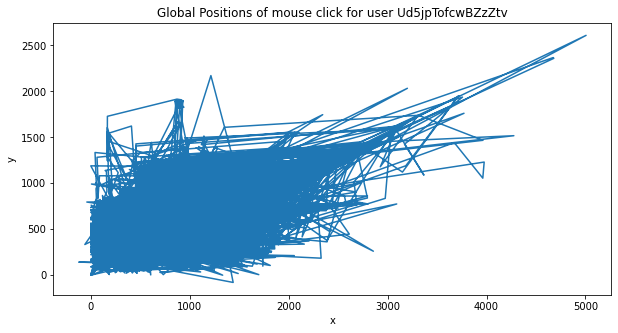

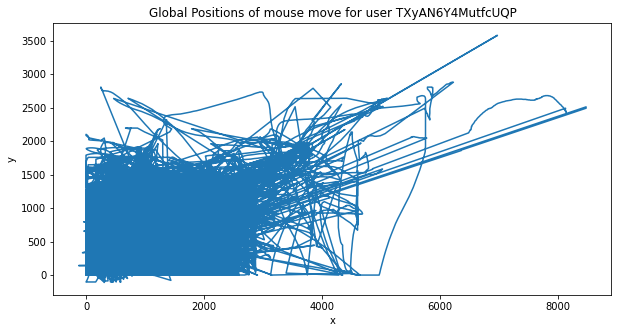

In [31]:
def plot_position(df, global_position, action):
    plt.figure(figsize=(10,5))
    plt.plot(global_position[:, 0], global_position[:, 1])
    plt.title('Global Positions of mouse '+action+' for user '+df['token'].unique()[1])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
plot_position(df_click, np.array(global_position_click), 'click')
plot_position(df_move, np.array(global_position_move), 'move')

### 3. Remove unneeded columns and NaN values

In [24]:
reduced_click = df_click
reduced_click = reduced_click.dropna()
reduced_click = reduced_click.drop(columns=['event','nodeName','nodeType','local_position','local_dimensions','Unnamed: 0'])

In [32]:
reduced_move = df_move
reduced_move = reduced_move.dropna()
reduced_move = reduced_move.drop(columns=['event','Unnamed: 0'])

In [26]:
reduced_scroll = df_scroll
reduced_scroll = reduced_scroll.dropna()
reduced_scroll = reduced_scroll.drop(columns=['event','Unnamed: 0'])

###  4. Get dataframes for each user

In [69]:
def get_df_for_user(df, user_token):
    '''
    Function to split dataframes by users
    '''
    mask = (df['token'].values == user_token)
    return df.loc[mask]


# save all tokens as a list
click_users = list(df_click['token'].unique())
move_users = list(df_move['token'].unique())
scroll_users = list(df_scroll['token'].unique())

# get the users with data in all datasets (taking INTERSECTION) - REVIEW!
unique_users = list(set(click_users) & set(move_users) & set(scroll_users))
print('total no. of unique users:', len(unique_users))
print('first unique user:', unique_users[0])

total no. of unique users: 153
first unique user: 017QphxNtGM4GpT9


In [70]:
# df_click_1 = get_df_for_user(reduced_click, unique_users[0])
# df_move_1 = get_df_for_user(reduced_move, unique_users[0])
# df_scroll_1 = get_df_for_user(reduced_scroll, unique_users[0])

In [76]:
# iterate thru all users and save the dataframes
for user in unique_users:
    df_click_1 = get_df_for_user(reduced_click, user)
    df_move_1 = get_df_for_user(reduced_move, user)
    df_scroll_1 = get_df_for_user(reduced_scroll, user)
    
    df_click_1.to_pickle('DLRV_Dataset/user_df/click/df_click_user_'+user+'.pkl')
    df_move_1.to_pickle('DLRV_Dataset/user_df/move/df_move_user_'+user+'.pkl')
    df_scroll_1.to_pickle('DLRV_Dataset/user_df/scroll/df_scroll_user_'+user+'.pkl')

In [75]:
# to read the pickle file for a particular user
df_click_user_1 = pd.read_pickle('DLRV_Dataset/user_df/click/df_click_user_017QphxNtGM4GpT9.pkl')

### 5. Split data into triplets 

In [77]:
# df_click_user_1

,time,token,global_position_int
8,2022-01-13 12:44:35.934000+00:00,017QphxNtGM4GpT9,"[327, 272]"
14,2022-01-13 12:45:09.735000+00:00,017QphxNtGM4GpT9,"[330, 384]"
22,2022-01-13 12:45:34.655000+00:00,017QphxNtGM4GpT9,"[341, 337]"
25,2022-01-13 12:45:41.845000+00:00,017QphxNtGM4GpT9,"[347, 321]"
29,2022-01-13 12:45:54.533000+00:00,017QphxNtGM4GpT9,"[326, 279]"
...,...,...,...
521,2022-01-20 13:18:51.147000+00:00,017QphxNtGM4GpT9,"[390, 640]"
523,2022-01-20 13:18:55.776000+00:00,017QphxNtGM4GpT9,"[434, 675]"
525,2022-01-20 13:19:04.198000+00:00,017QphxNtGM4GpT9,"[327, 690]"
526,2022-01-20 13:19:06.690000+00:00,017QphxNtGM4GpT9,"[324, 741]"
